# 

# SVI模型


## 2D测试数据
测试数据为2023年7月26日l2309期权的隐含波动率及对应的波动率，日历日到期时长为 `43.0`。当日l2309期货收盘价为 `8179.0`。

In [ ]:
import sys, os
sys.path.insert(0, os.path.abspath('../../../process_data'))

import pandas as pd
df = pd.read_csv("l2309_20230726.csv")
df

,strikes,ivs
0,7100,0.269966
1,7200,0.246217
2,7300,0.222838
3,7400,0.202008
4,7500,0.184172
5,7600,0.169899
6,7700,0.158302
7,7800,0.150774
8,7900,0.145299
9,8000,0.141661


## 结果比较

以观测到的市场点（即隐含波动率）为测试基准，比较分析采用原始SVI和Quasi-Explicit SVI的计算结果。

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.0586298529238674e-07
            Iterations: 59
            Function evaluations: 377
            Gradient evaluations: 59


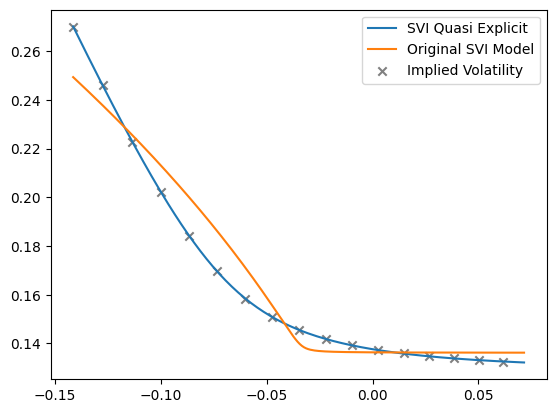

In [6]:
T = 43.0/365.0  # calendar TTm
strikes = df.strikes.values
ivs = df.ivs.values
spot = 8179.0 # l2309 price

from svi_quasi_explicit import *
k = np.log(strikes/ spot)
params = svi_quasi_explicit_fit(k, ivs, T)
svi_strikes = np.arange(k[0], k[-1] + 0.01, 0.001)
vol_quasi_svi = w_svi_quasi(params[0], params[1], svi_strikes, T)

from svi_fit import *
var = np.power(ivs, 2) * T
svi_params = svi_curve_fit(k, var)
var_svi = w_svi(svi_params, svi_strikes)
vol_svi = np.sqrt(var_svi / T)


import matplotlib.pyplot as plt
plt.plot(svi_strikes, vol_quasi_svi, label = "SVI Quasi Explicit")
plt.plot(svi_strikes, vol_svi, label = "Original SVI Model")
plt.scatter(k, ivs, marker = "x", color = 'grey', label = "Implied Volatility")
plt.legend()
plt.savefig("../figures/2D_comp.png")
plt.show()


## 模型比较

采用RMSE(Root Mean Squared Error)比较SVI波动率与隐含波动率之间的误差。RMSE的公式如下：

$$
RMSE = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}
$$


In [3]:
vol_quasi_svi = w_svi_quasi(params[0], params[1], k, T)
rmse_quasi = np.sqrt(np.mean((vol_quasi_svi - ivs)**2))

var_svi = w_svi(svi_params, k)
vol_svi = np.sqrt(var_svi / T)
rmse_svi = np.sqrt(np.mean((vol_svi - ivs)**2))

print(f"RMSE for Quasi Explicit Estimation: {rmse_quasi}")
print(f"RMSE for Original SVI Estimation: {rmse_svi}")

RMSE for Quasi Explicit Estimation: 0.00021079151215087837
RMSE for Original SVI Estimation: 0.009162684305542132


## 3D 曲面比较

隐含波动率曲面如下：

![iv](vol_figs/market_iv.png)

原始SVI波动率曲面如下：

![svi](vol_figs/SVI_original.png)

Quasi-explicit波动率曲面如下：

![Quasi-Explicit](vol_figs/quasi_explicit.png)
